In [19]:
import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
from trainAlgorithm import *
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns

sns.set_theme()

In [20]:
path = "Outputs/fundamental/"

In [21]:
def create_results(path):
    with open(os.path.join(path, "results_end.csv"), "w") as end_file:
        
        with open(os.path.join(path, "results.csv"), "r") as file:
            line = file.readline()[0:-1]
            end_file.write(f"{line},n_nodes\n")

        for file in os.listdir(path):
            if file.endswith(".csv") and file not in ["results.csv", "results_end.csv"]:
                with open(os.path.join(path, file), "r") as read_file:
                    
                    line = read_file.readline()[0:-1]

                    tree_path = file.replace("results", "tree").replace(".csv", "")
                    with open(path + "/trees/" + tree_path, "rb") as tree_file:
                        # print(path + "/trees/" + tree_path)
                        tree = pickle.load(tree_file)
                        length = len(tree)
                    # print(f"{line},{length}")
                    end_file.write(f"{line},{length}\n")
                
                


In [22]:
create_results(path+"base")
df_base = pd.read_csv(path+"base/results_end.csv")
df_base = df_base.sort_values("population").reset_index(drop=True)

create_results(path+"base_specific")
df_base_specific = pd.read_csv(path+"base_specific/results_end.csv")
df_base_specific = df_base_specific.sort_values("population").reset_index(drop=True)

create_results(path+"base_generations")
df_generations = pd.read_csv(path+"base_generations/results_end.csv")
df_generations = df_generations.sort_values("population").reset_index(drop=True)

create_results(path+"base_generations_specific")
df_generations_specific = pd.read_csv(path+"base_generations_specific/results_end.csv")
df_generations_specific = df_generations_specific.sort_values("population").reset_index(drop=True)

In [23]:
df_base.head(2)

fitness_score  population  generations  training_time  i_run  n_nodes
0       0.030386          20            3       0.671769      0       12
1       0.016667          30            3       0.889481      0       10

# Fundamental Tests

## Time Comparison

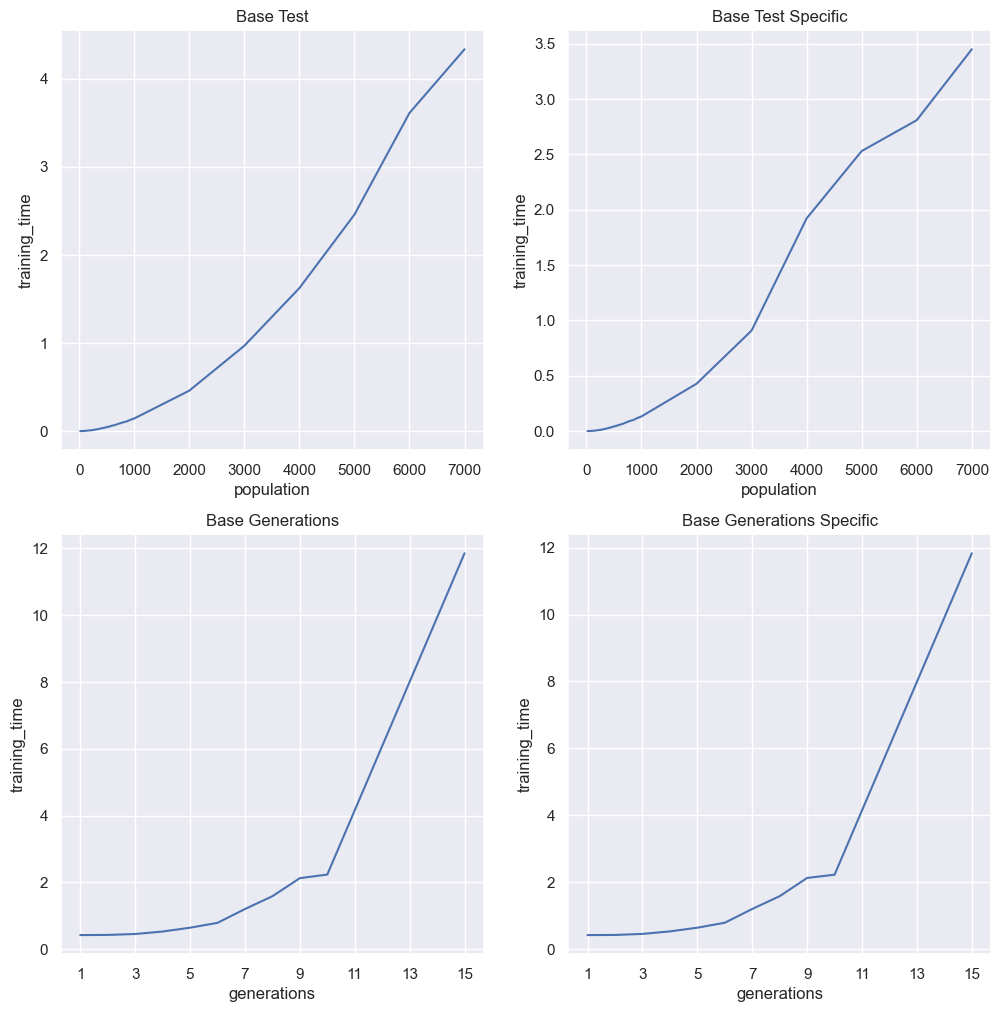

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

ax = axs[0, 0]
df_base["training_time"] = df_base["training_time"]/3600
sns.lineplot(data=df_base, x="population", y="training_time", ax=ax)
ax.set_title("Base Test")


ax = axs[0, 1]
df_base_specific["training_time"] = df_base_specific["training_time"]/3600
sns.lineplot(data=df_base_specific, x="population", y="training_time", ax=ax)
ax.set_title("Base Test Specific")

ax = axs[1, 0]
df_generations["training_time"] = df_generations["training_time"]/3600
sns.lineplot(data=df_generations, x="generations", y="training_time", ax=ax)
ax.set_title("Base Generations")
ax.set_xticks([i for i in range(1, 16, 2)])

ax = axs[1, 1]
df_generations_specific["training_time"] = df_generations_specific["training_time"]/3600
sns.lineplot(data=df_generations_specific, x="generations", y="training_time", ax=ax)
ax.set_title("Base Generations Specific")
ax.set_xticks([i for i in range(1, 16, 2)])

plt.show()

## Error Comparison

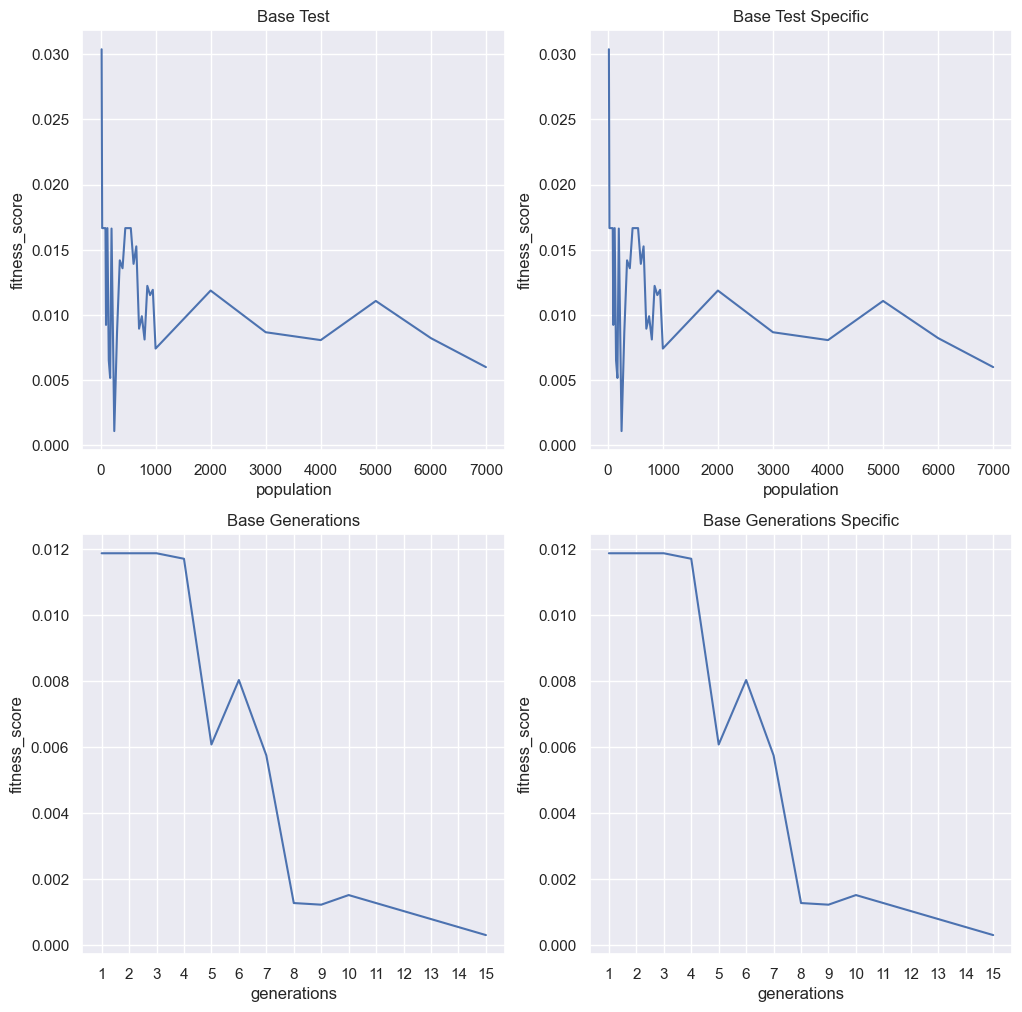

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

ax = axs[0, 0]

sns.lineplot(data=df_base, x="population", y="fitness_score", ax=ax)
ax.set_title("Base Test")


ax = axs[0, 1]

sns.lineplot(data=df_base_specific, x="population", y="fitness_score", ax=ax)
ax.set_title("Base Test Specific")

ax = axs[1, 0]

sns.lineplot(data=df_generations, x="generations", y="fitness_score", ax=ax)
ax.set_title("Base Generations")
ax.set_xticks([i for i in range(1, 16)])

ax = axs[1, 1]

sns.lineplot(data=df_generations_specific, x="generations", y="fitness_score", ax=ax)
ax.set_title("Base Generations Specific")
ax.set_xticks([i for i in range(1, 16)])

plt.show()

In [26]:
SR = SymbolicRegression(3)

functions = SR._functions
functions.append("exp-")

operators = SR._operators

custom_functions_dict = SR.custom_functions_dict
custom_functions_dict["exp-"] = ["np.exp(-", ")"]

In [30]:
values = [20, 30, 40, 50, 60, 70, 80, 90, 100,
          125, 150, 175, 200, 250, 300, 350,
          400, 450, 500, 550, 600, 650, 700,
          750, 800, 850, 900, 950, 1000,
          2000, 3000, 4000, 5000, 6000, 7000]

generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]

# for tree_path in values:
#     with open(f"{path}base/trees/tree-{tree_path}-3-0", "rb") as file:
#         tree = pickle.load(file)
#         smp_expr = tree.toSmpExpr(operators, functions, custom_functions_dict)
#         display(smp_expr.expand())

# for tree_path in values:
#     with open(f"{path}base_specific/trees/tree-{tree_path}-3-0", "rb") as file:
#         tree = pickle.load(file)
#         smp_expr = tree.toSmpExpr(operators, functions, custom_functions_dict)
#         display(smp_expr.expand())

# for tree_path in generations:
#     with open(f"{path}base_generations/trees/tree-2000-{tree_path}-0", "rb") as file:
#         tree = pickle.load(file)
#         smp_expr = tree.toSmpExpr(operators, functions, custom_functions_dict)
#         display(smp_expr.expand())

for tree_path in generations:
    with open(f"{path}base_generations_specific/trees/tree-2000-{tree_path}-0", "rb") as file:
        tree = pickle.load(file)
        smp_expr = tree.toSmpExpr(operators, functions, custom_functions_dict)
        display(smp_expr.expand())


1.18329297431584*x + 6.35934551092983e-5

2.435719202335396 - exp(exp(-x))

2.899*x**2*exp(-x) + x**2*exp(-2*x)

exp(-19.295550704396707*exp(-9.407488117907668*x))

exp(-28.6230518632789*exp(-10.27072575088609*x))

exp(-35.95754277565369*exp(-9.739265517992301*x))

exp(-46.5599294998706*exp(-10.65682221725911*x)*exp(x**2))

exp(-36.803486375258432*exp(-9.301758948903242*x)*exp(-0.01147874170586647*exp(x)))

exp(-46.04584309326068*exp(-9.86262821179516*x))

exp(-44.387248814030759*exp(-9.979962214268932*x))

exp(-57.71299931666528*exp(-10.649571525934412*x)*exp(x**2)*exp(x**4*exp(-exp(x**2)*exp(-x*exp(-x))))*exp(-0.1202365004513071*exp(x)))

## Expression Length

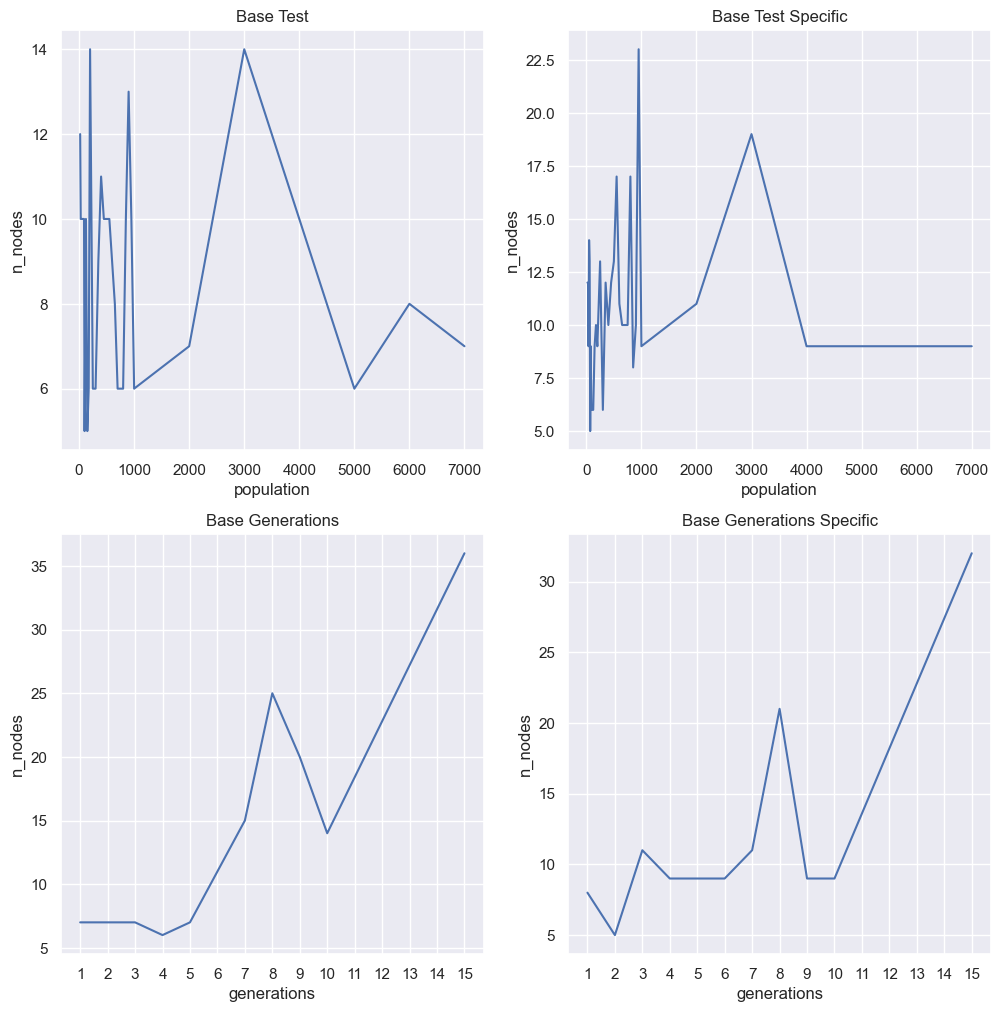

In [225]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

ax = axs[0, 0]

sns.lineplot(data=df_base, x="population", y="n_nodes", ax=ax)
ax.set_title("Base Test")


ax = axs[0, 1]

sns.lineplot(data=df_base_specific, x="population", y="n_nodes", ax=ax)
ax.set_title("Base Test Specific")

ax = axs[1, 0]

sns.lineplot(data=df_generations, x="generations", y="n_nodes", ax=ax)
ax.set_title("Base Generations")
ax.set_xticks([i for i in range(1, 16)])

ax = axs[1, 1]

sns.lineplot(data=df_generations_specific, x="generations", y="n_nodes", ax=ax)
ax.set_title("Base Generations Specific")
ax.set_xticks([i for i in range(1, 16)])

plt.show()

# Coloquinho Tests

## Pêndulo Amortecido

$$\theta(t) = e^{-\frac{t}{10}}\big(3cos(2t)\big)$$

In [385]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(smp.Number)})

def generate_pdfs(path):
    paths = os.listdir(path)

    exprs = []

    for tree_path in paths:
        if "img" not in tree_path:
            with open(path+tree_path, "rb") as file:
                print(path+tree_path)
                tree = pickle.load(file)
                tree.visualize_tree().render(path+tree_path+"_img", format="png")

                exprs.append(round_expr(tree.toSmpExpr(operators, functions, custom_functions_dict).expand(), 8))
    return exprs

In [386]:
optimization_kind = ["PSO", "LS", "random_LS", "dual_annealing", "differential_evolution"]

path = "Outputs/damped_pendulum/"

exprs = []

for opt in optimization_kind:
    expr = generate_pdfs(path+opt+"/trees/")
    exprs.append(expr)

Outputs/damped_pendulum/PSO/trees/tree-100-5-0
Outputs/damped_pendulum/PSO/trees/tree-100-5-1
Outputs/damped_pendulum/PSO/trees/tree-100-5-2
Outputs/damped_pendulum/LS/trees/tree-100-5-0
Outputs/damped_pendulum/LS/trees/tree-100-5-1
Outputs/damped_pendulum/LS/trees/tree-100-5-2
Outputs/damped_pendulum/random_LS/trees/tree-100-5-0
Outputs/damped_pendulum/random_LS/trees/tree-100-5-1
Outputs/damped_pendulum/random_LS/trees/tree-100-5-2
Outputs/damped_pendulum/dual_annealing/trees/tree-100-5-0
Outputs/damped_pendulum/dual_annealing/trees/tree-100-5-1
Outputs/damped_pendulum/dual_annealing/trees/tree-100-5-2
Outputs/damped_pendulum/differential_evolution/trees/tree-100-5-0
Outputs/damped_pendulum/differential_evolution/trees/tree-100-5-1
Outputs/damped_pendulum/differential_evolution/trees/tree-100-5-2


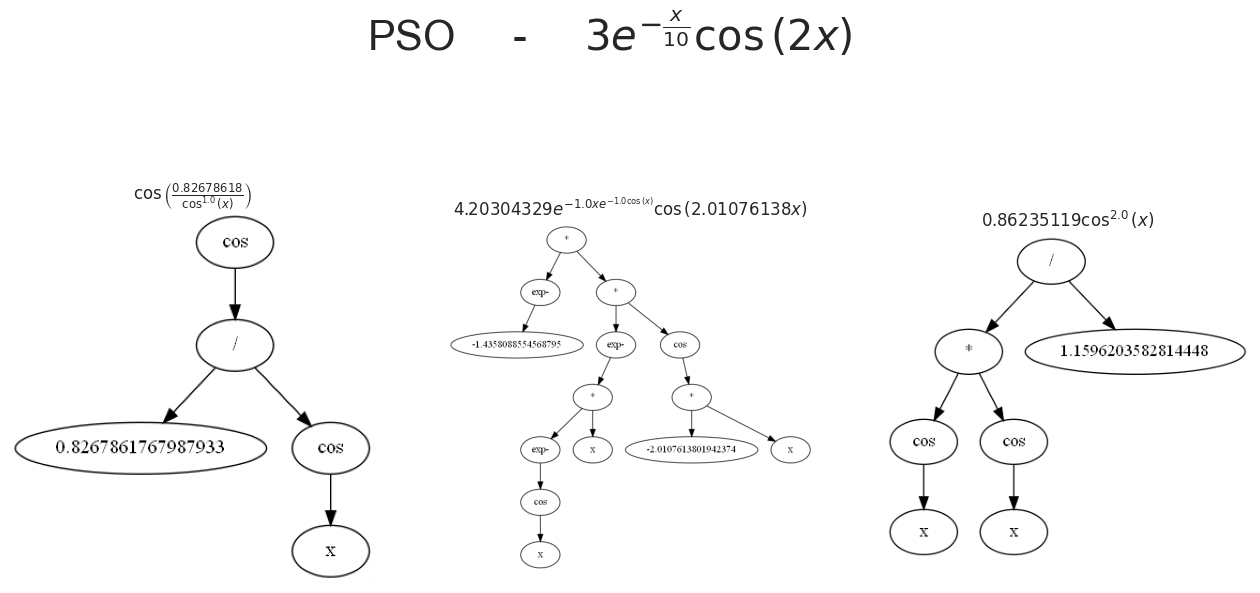

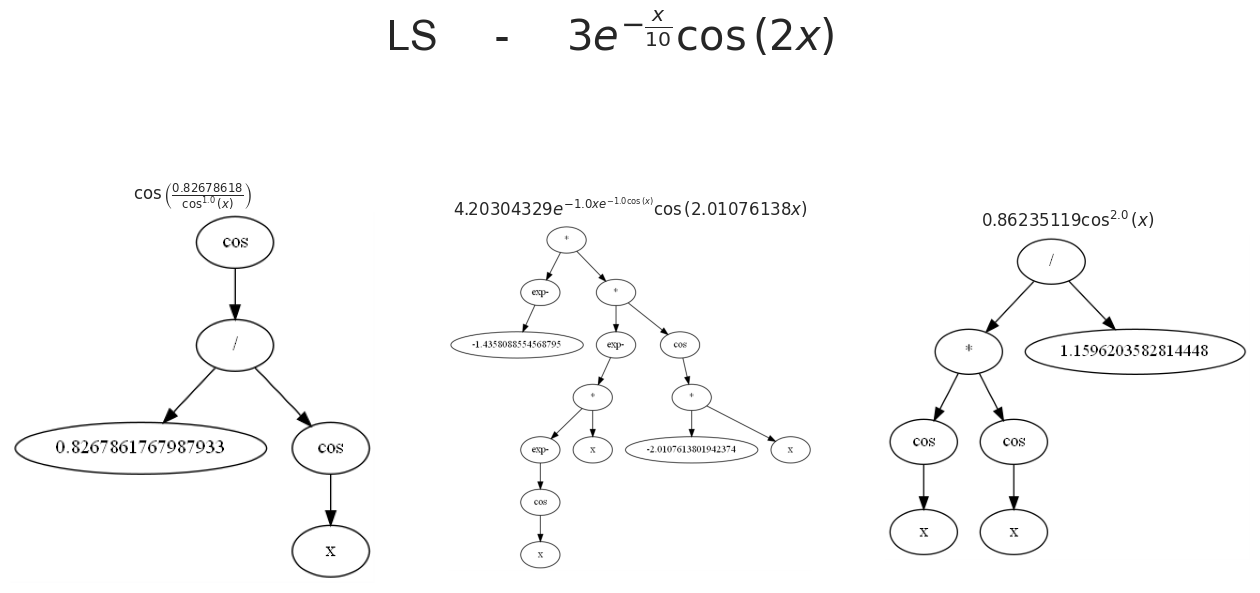

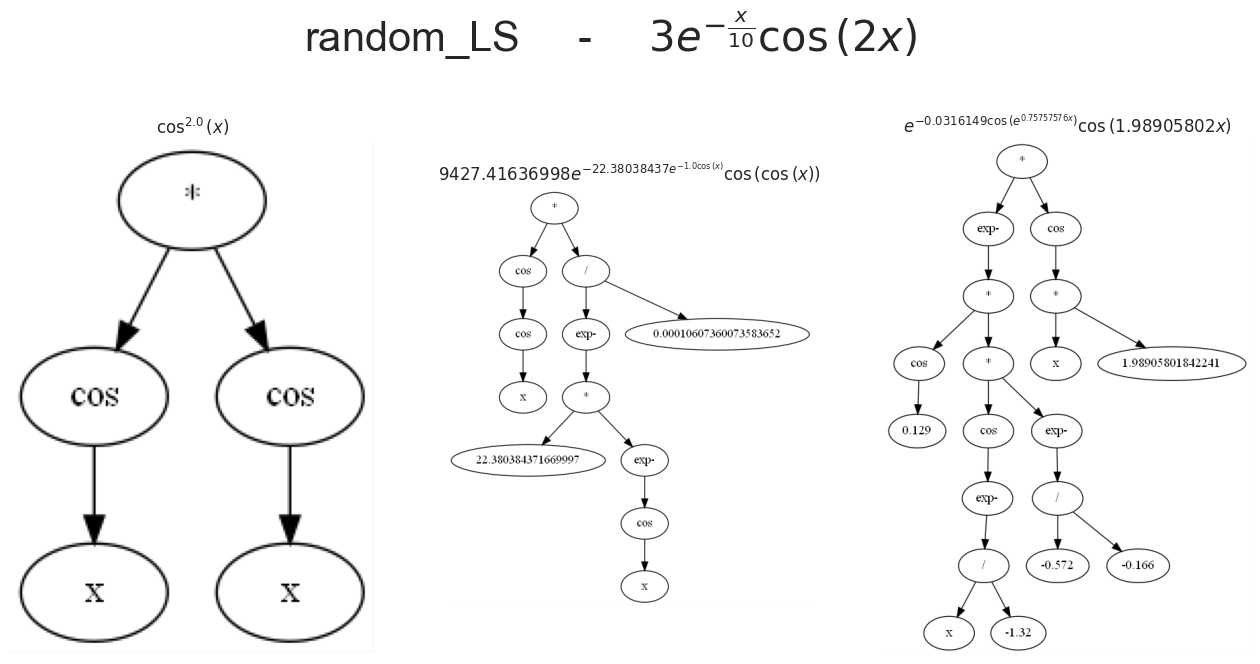

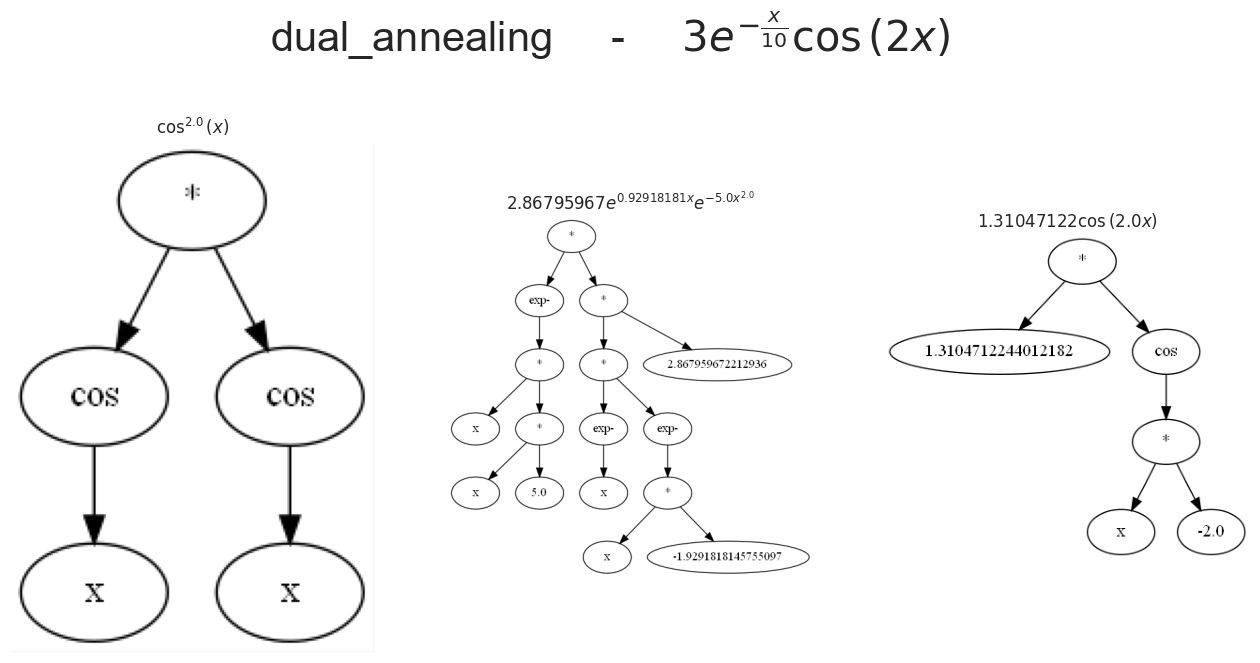

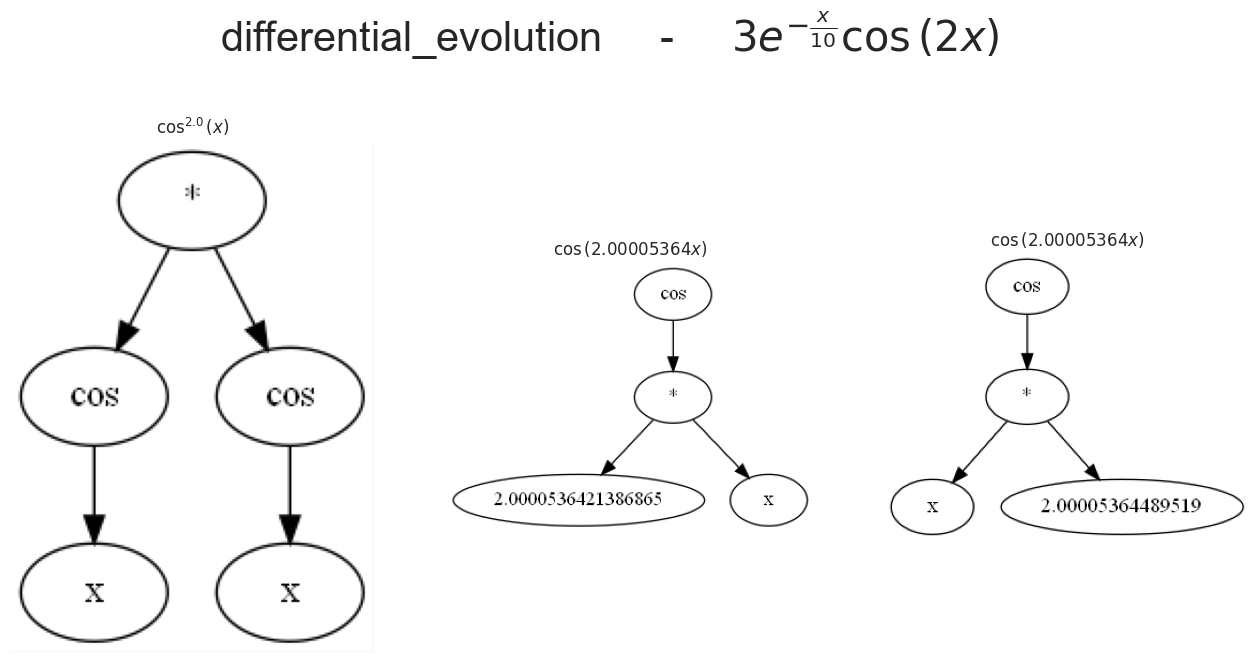

In [387]:
x = smp.symbols("x")
expr = smp.exp(-x/10)*(3*smp.cos(2*x))

for c, opt in enumerate(optimization_kind):
    fig, axs = plt.subplots(1, 3, figsize=(16, 8))

    plt.suptitle(f"{opt}     -     ${smp.printing.latex(expr)}$", fontsize=30)

    for k in range(0, 3):
        ax = axs[k]
        img = plt.imread(f"Outputs/damped_pendulum/{opt}/trees/tree-100-5-{k}_img.png")
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(f"${smp.printing.latex(exprs[c][k])}$")
    plt.show()

## Lançamento Real

$$y=3.14x-\frac{g}{8}\cdot x^{2}$$

In [380]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(smp.Number)})

def generate_pdfs(path):
    paths = os.listdir(path)

    exprs = []

    for tree_path in paths:
        if "img" not in tree_path:
            with open(path+tree_path, "rb") as file:
                print(path+tree_path)
                tree = pickle.load(file)
                tree.visualize_tree().render(path+tree_path+"_img", format="png")

                exprs.append(round_expr(tree.toSmpExpr(operators, functions, custom_functions_dict).expand(), 8))
    return exprs

In [381]:
optimization_kind = ["PSO", "LS", "random_LS", "dual_annealing", "differential_evolution"]

path = "Outputs/oblique_projectile_real/"

exprs = []

for opt in optimization_kind:
    expr = generate_pdfs(path+opt+"/trees/")
    exprs.append(expr)

Outputs/oblique_projectile_real/PSO/trees/tree-100-5-0
Outputs/oblique_projectile_real/PSO/trees/tree-100-5-1
Outputs/oblique_projectile_real/PSO/trees/tree-100-5-2
Outputs/oblique_projectile_real/LS/trees/tree-100-5-0
Outputs/oblique_projectile_real/LS/trees/tree-100-5-1
Outputs/oblique_projectile_real/LS/trees/tree-100-5-2
Outputs/oblique_projectile_real/random_LS/trees/tree-100-5-0
Outputs/oblique_projectile_real/random_LS/trees/tree-100-5-1
Outputs/oblique_projectile_real/random_LS/trees/tree-100-5-2
Outputs/oblique_projectile_real/dual_annealing/trees/tree-100-5-0
Outputs/oblique_projectile_real/dual_annealing/trees/tree-100-5-1
Outputs/oblique_projectile_real/dual_annealing/trees/tree-100-5-2
Outputs/oblique_projectile_real/differential_evolution/trees/tree-100-5-0
Outputs/oblique_projectile_real/differential_evolution/trees/tree-100-5-1
Outputs/oblique_projectile_real/differential_evolution/trees/tree-100-5-2


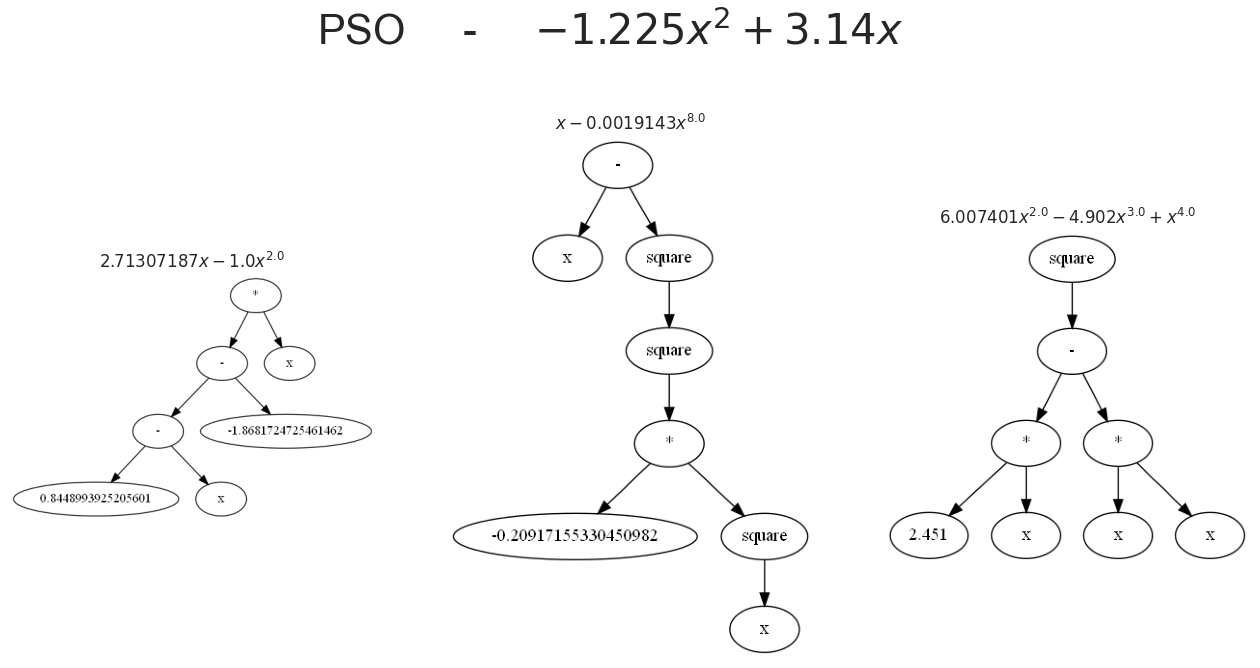

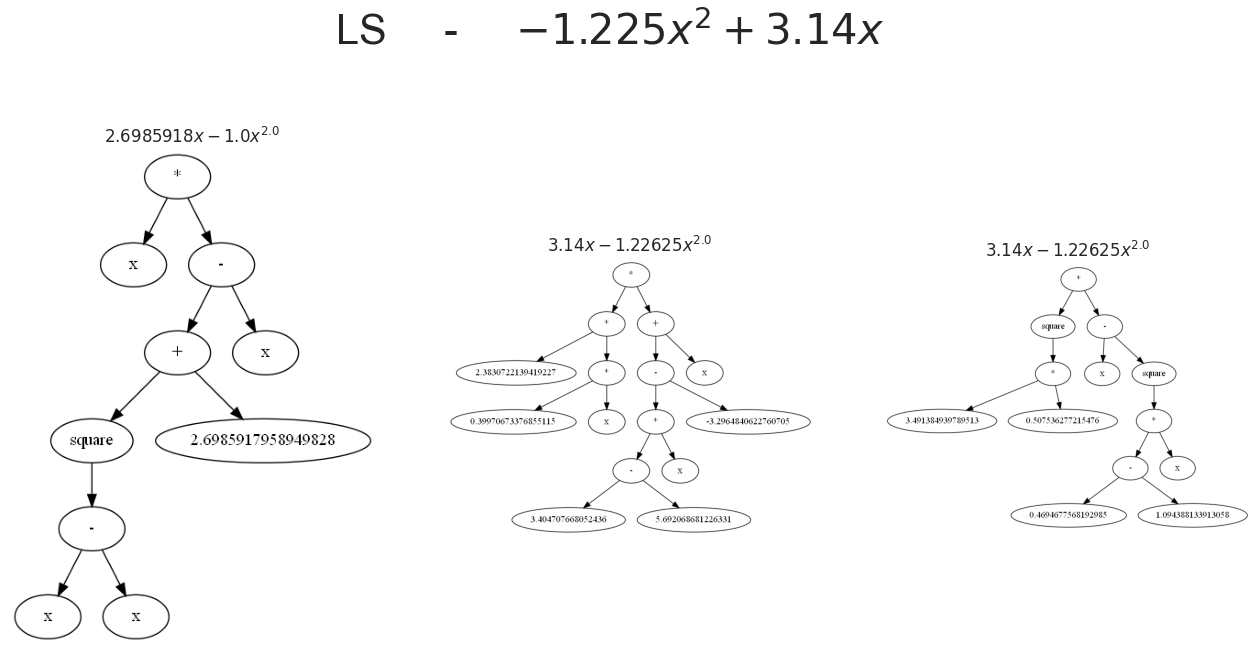

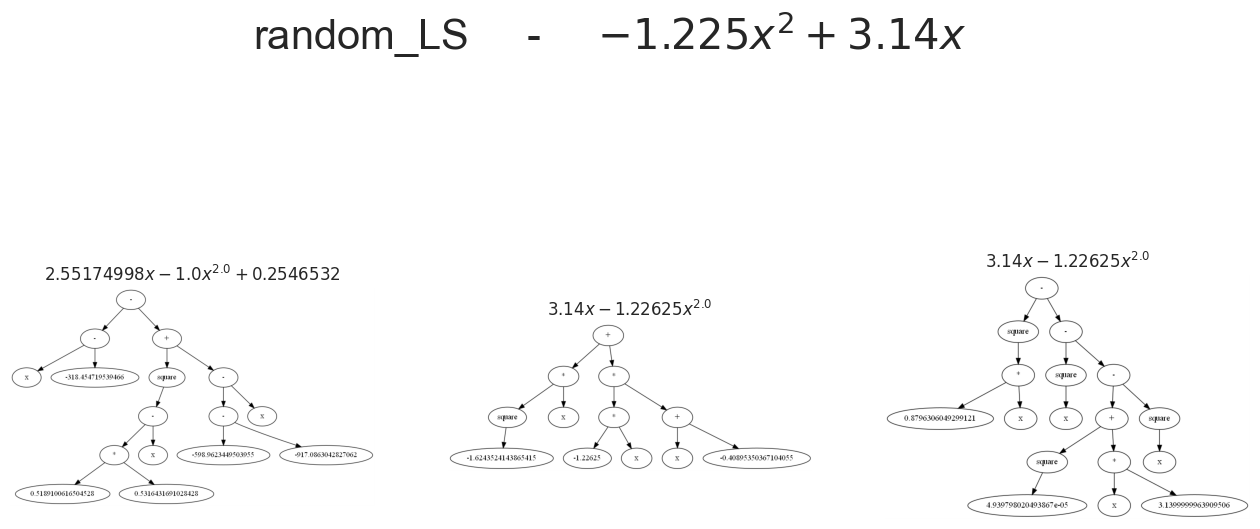

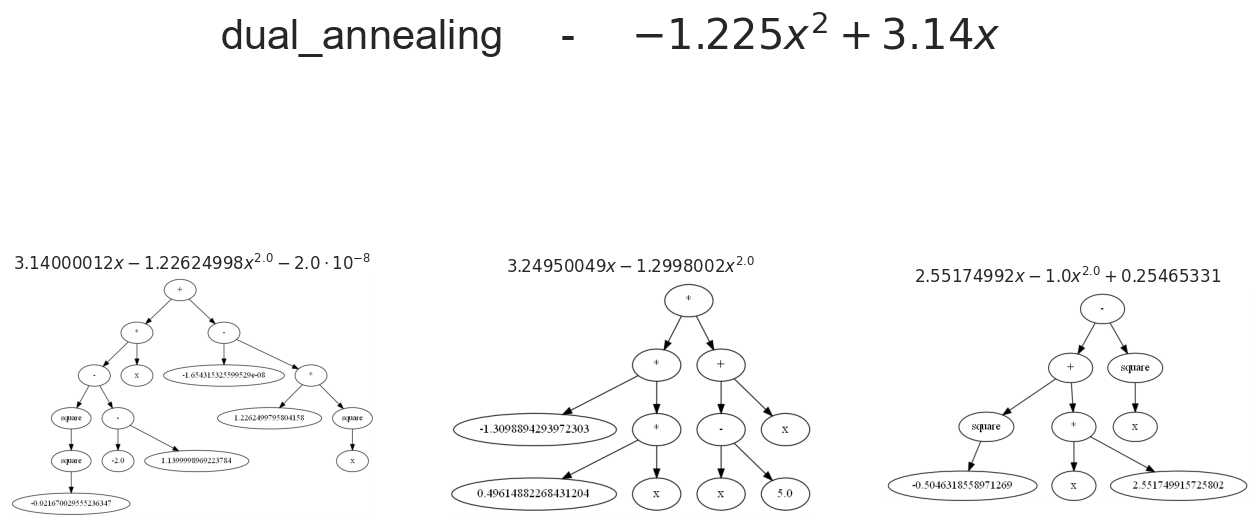

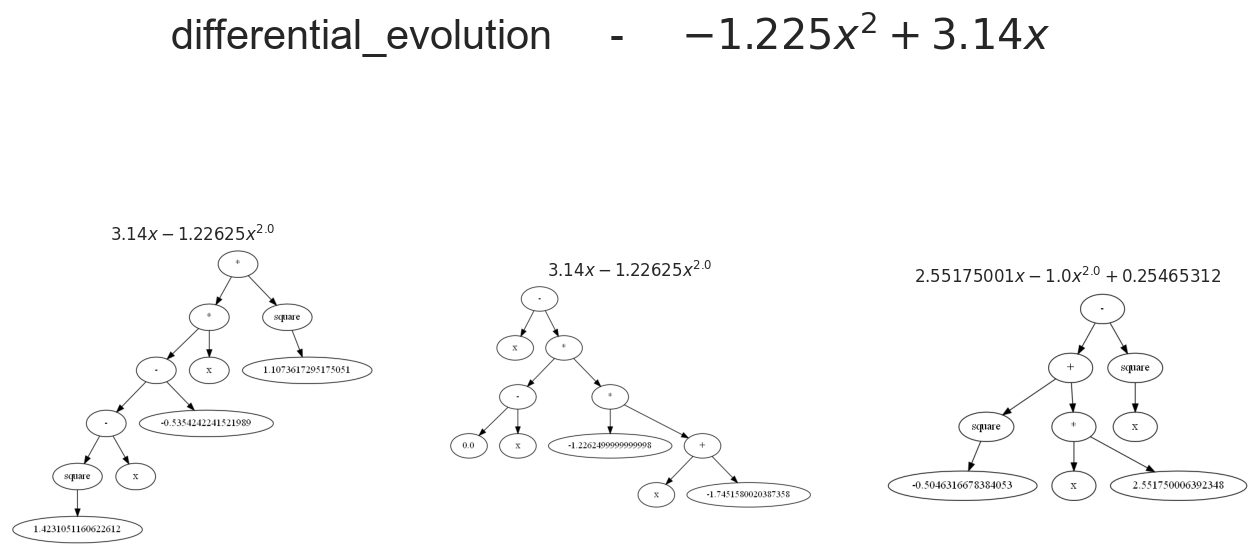

In [384]:
x = smp.symbols("x")
expr = 3.14*x-9.8/8*x**2

for c, opt in enumerate(optimization_kind):
    fig, axs = plt.subplots(1, 3, figsize=(16, 8))

    plt.suptitle(f"{opt}     -     ${smp.printing.latex(expr)}$", fontsize=30)

    for k in range(0, 3):
        ax = axs[k]
        img = plt.imread(f"Outputs/oblique_projectile_real/{opt}/trees/tree-100-5-{k}_img.png")
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(f"${smp.printing.latex(exprs[c][k])}$")
    plt.show()

## Lançamento Real New Const

$$y=6x-9.8x^{2}$$

In [388]:
optimization_kind = ["PSO", "LS", "random_LS", "dual_annealing", "differential_evolution"]

path = "Outputs/oblique_projectile_real_new_const/"

exprs = []

for opt in optimization_kind:
    expr = generate_pdfs(path+opt+"/trees/")
    exprs.append(expr)

Outputs/oblique_projectile_real_new_const/PSO/trees/tree-100-5-0
Outputs/oblique_projectile_real_new_const/PSO/trees/tree-100-5-1
Outputs/oblique_projectile_real_new_const/PSO/trees/tree-100-5-2
Outputs/oblique_projectile_real_new_const/LS/trees/tree-100-5-0
Outputs/oblique_projectile_real_new_const/LS/trees/tree-100-5-1
Outputs/oblique_projectile_real_new_const/LS/trees/tree-100-5-2
Outputs/oblique_projectile_real_new_const/random_LS/trees/tree-100-5-0
Outputs/oblique_projectile_real_new_const/random_LS/trees/tree-100-5-1
Outputs/oblique_projectile_real_new_const/random_LS/trees/tree-100-5-2
Outputs/oblique_projectile_real_new_const/dual_annealing/trees/tree-100-5-0
Outputs/oblique_projectile_real_new_const/dual_annealing/trees/tree-100-5-1
Outputs/oblique_projectile_real_new_const/dual_annealing/trees/tree-100-5-2
Outputs/oblique_projectile_real_new_const/differential_evolution/trees/tree-100-5-0
Outputs/oblique_projectile_real_new_const/differential_evolution/trees/tree-100-5-1
Outp

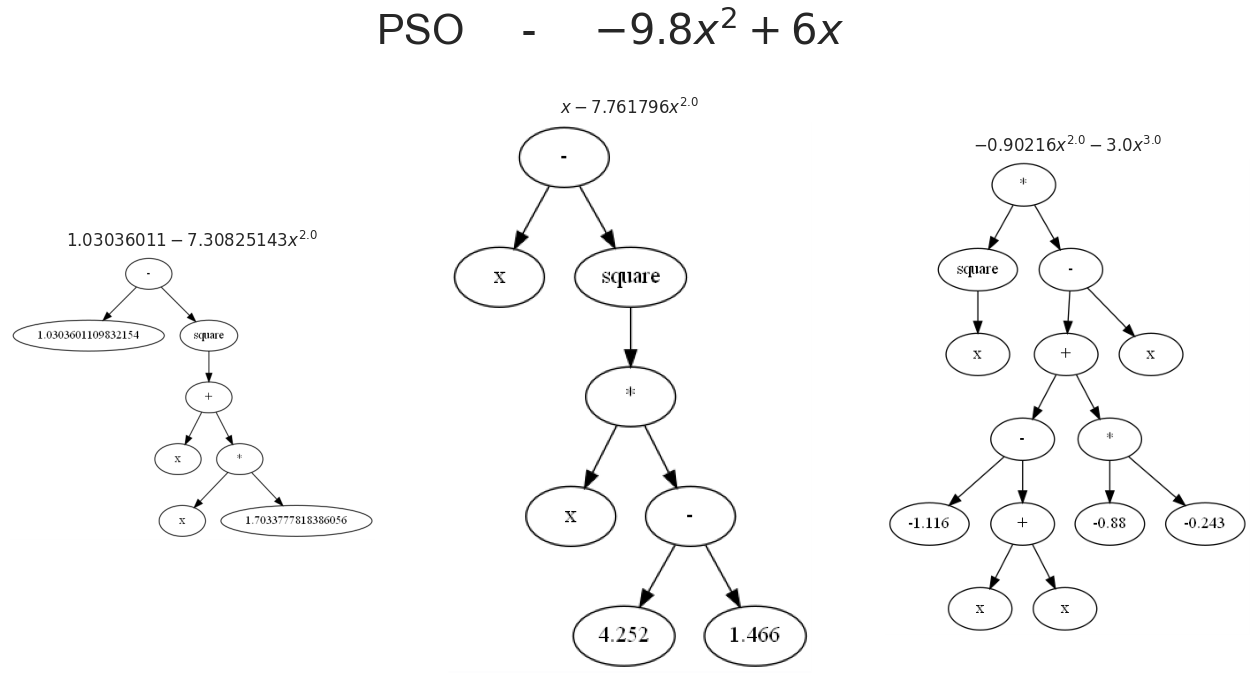

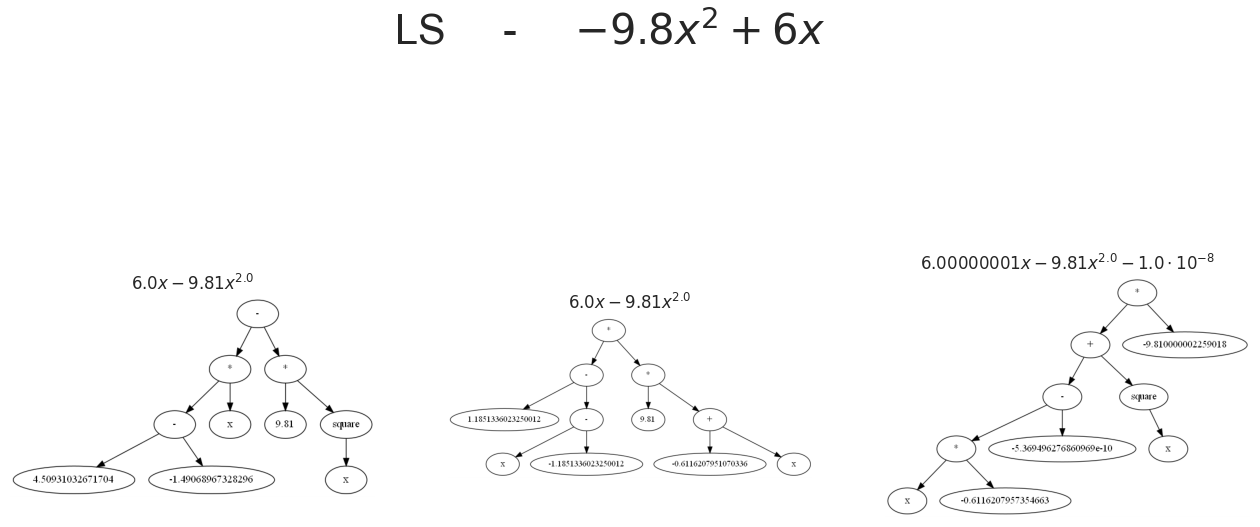

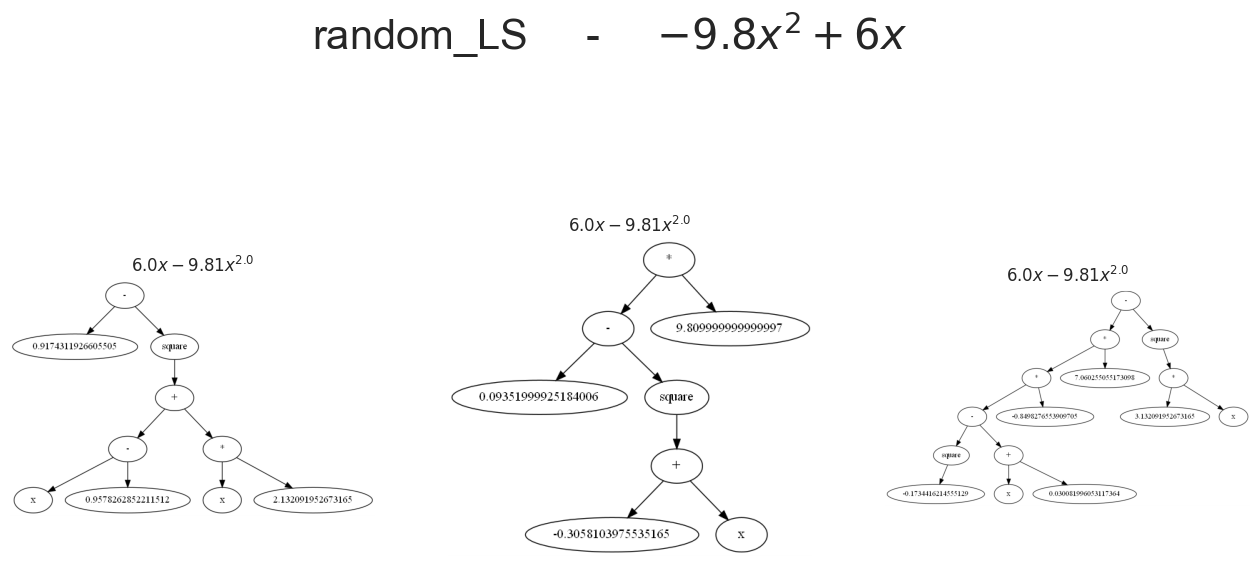

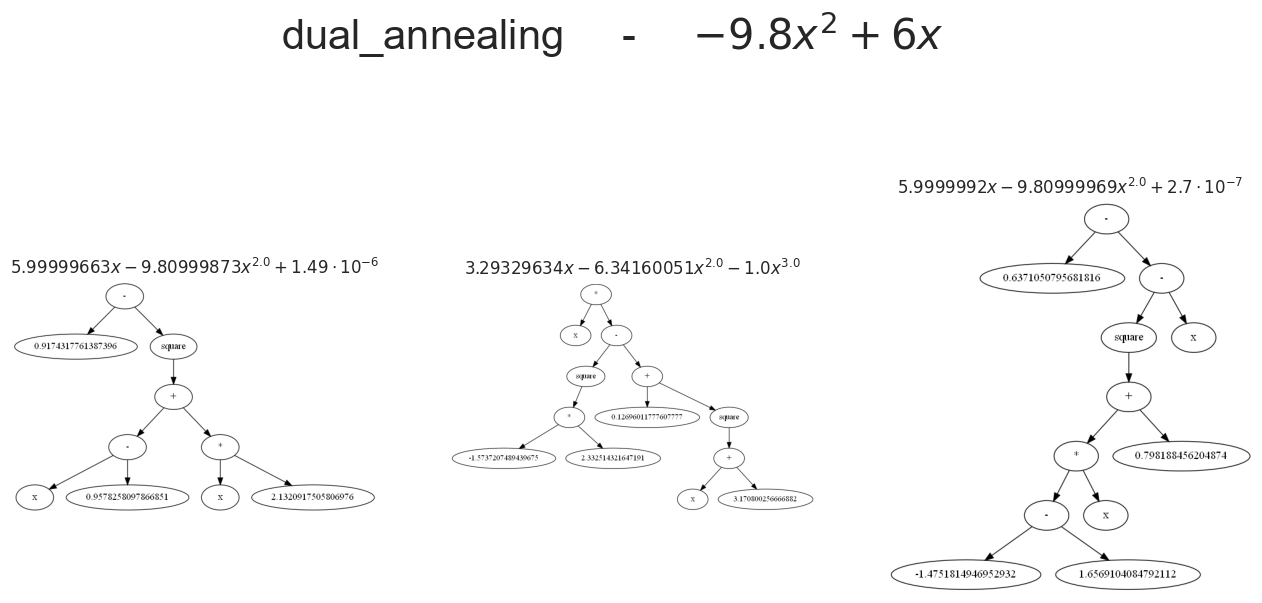

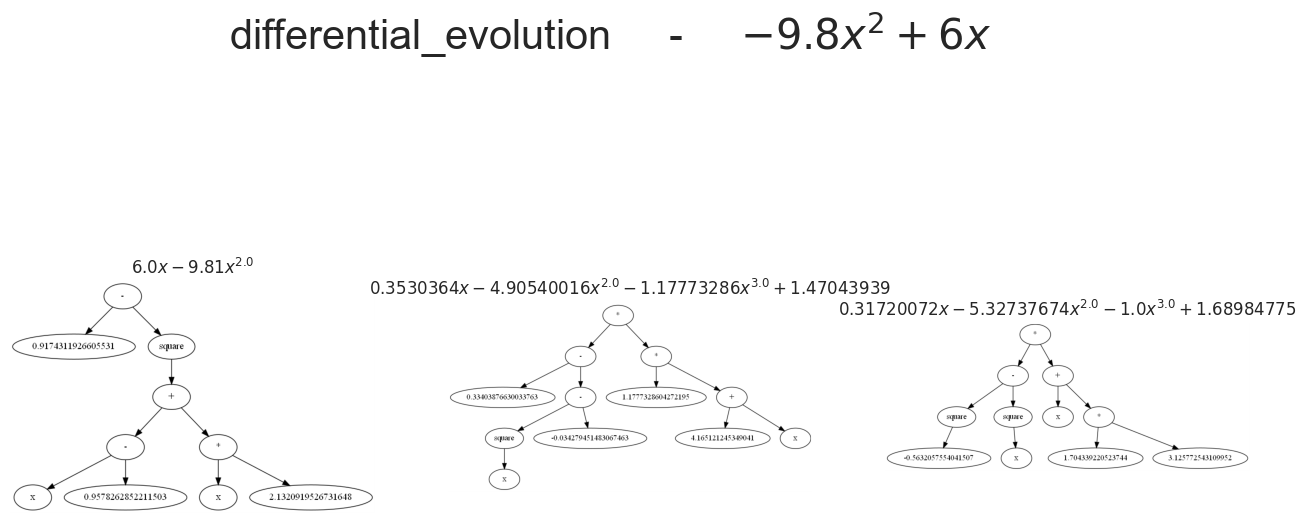

In [389]:
x = smp.symbols("x")
expr = 6*x-9.8*x**2

for c, opt in enumerate(optimization_kind):
    fig, axs = plt.subplots(1, 3, figsize=(16, 8))

    plt.suptitle(f"{opt}     -     ${smp.printing.latex(expr)}$", fontsize=30)

    for k in range(0, 3):
        ax = axs[k]
        img = plt.imread(f"Outputs/oblique_projectile_real_new_const/{opt}/trees/tree-100-5-{k}_img.png")
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(f"${smp.printing.latex(exprs[c][k])}$")
    plt.show()

# Testes Artigo

## F1

$$y(x) = 1.57 + 24.3x$$

In [390]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(smp.Number)})

def generate_pdfs(path):
    paths = os.listdir(path)

    exprs = []

    for tree_path in paths:
        if "img" not in tree_path:
            with open(path+tree_path, "rb") as file:
                print(path+tree_path)
                tree = pickle.load(file)
                tree.visualize_tree().render(path+tree_path+"_img", format="png")

                exprs.append(round_expr(tree.toSmpExpr(operators, functions, custom_functions_dict).expand(), 8))
    return exprs

In [392]:
optimization_kind = ["PSO", "LS", "random_LS", "dual_annealing", "differential_evolution"]

path = "Outputs/article_tests_new/F1_new/"

exprs = []

for opt in optimization_kind:
    expr = generate_pdfs(path+opt+"/trees/")
    exprs.append(expr)

Outputs/article_tests_new/F1_new/PSO/trees/tree-2000-8-0
Outputs/article_tests_new/F1_new/PSO/trees/tree-2000-8-1
Outputs/article_tests_new/F1_new/PSO/trees/tree-2000-8-2
Outputs/article_tests_new/F1_new/LS/trees/tree-2000-8-0
Outputs/article_tests_new/F1_new/LS/trees/tree-2000-8-1
Outputs/article_tests_new/F1_new/LS/trees/tree-2000-8-2
Outputs/article_tests_new/F1_new/random_LS/trees/tree-2000-8-0
Outputs/article_tests_new/F1_new/random_LS/trees/tree-2000-8-1
Outputs/article_tests_new/F1_new/random_LS/trees/tree-2000-8-2
Outputs/article_tests_new/F1_new/dual_annealing/trees/tree-2000-8-0
Outputs/article_tests_new/F1_new/dual_annealing/trees/tree-2000-8-1
Outputs/article_tests_new/F1_new/dual_annealing/trees/tree-2000-8-2
Outputs/article_tests_new/F1_new/differential_evolution/trees/tree-2000-8-0
Outputs/article_tests_new/F1_new/differential_evolution/trees/tree-2000-8-1
Outputs/article_tests_new/F1_new/differential_evolution/trees/tree-2000-8-2


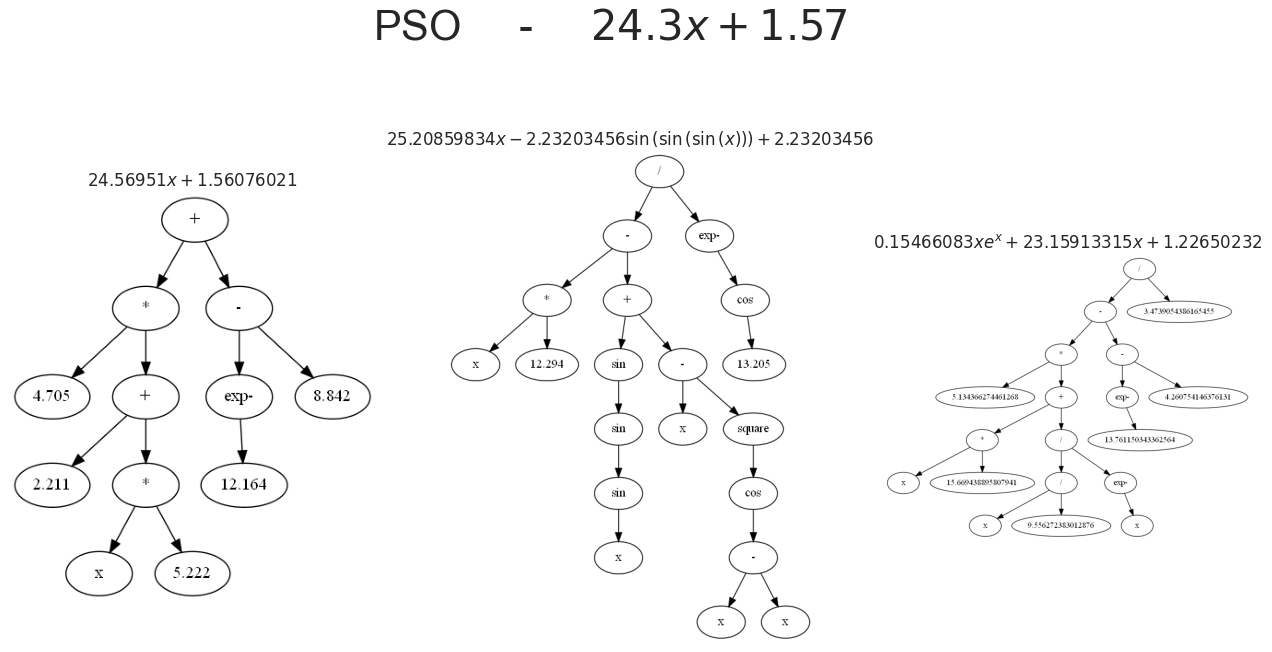

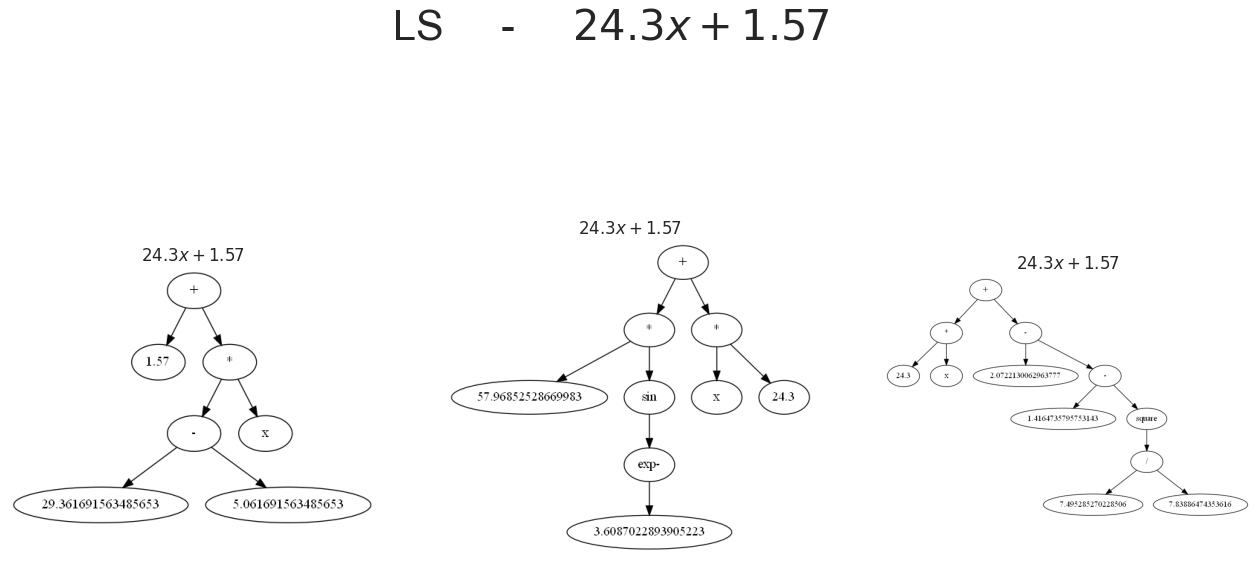

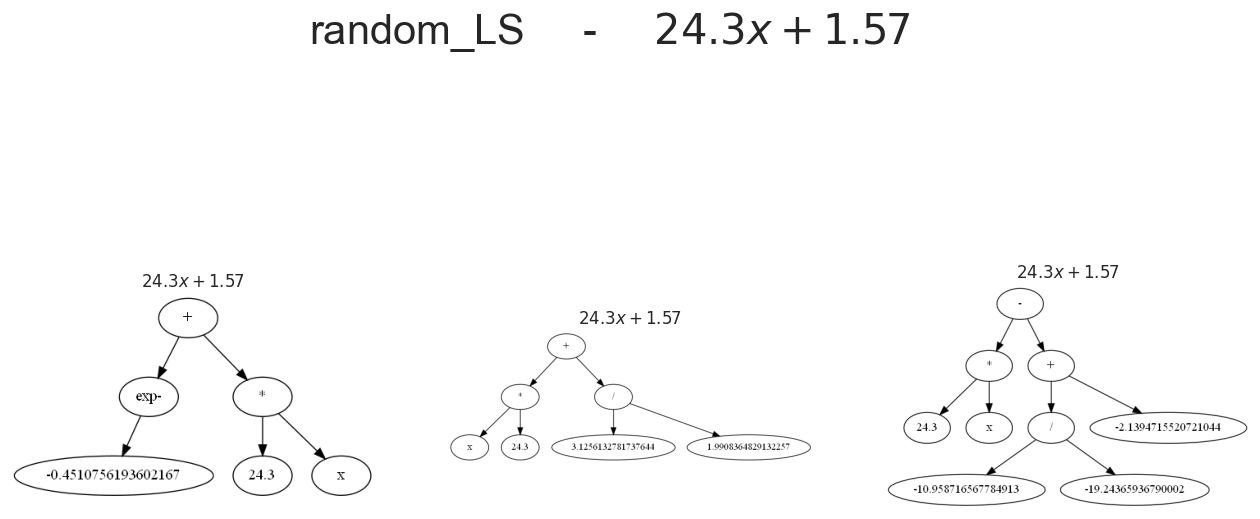

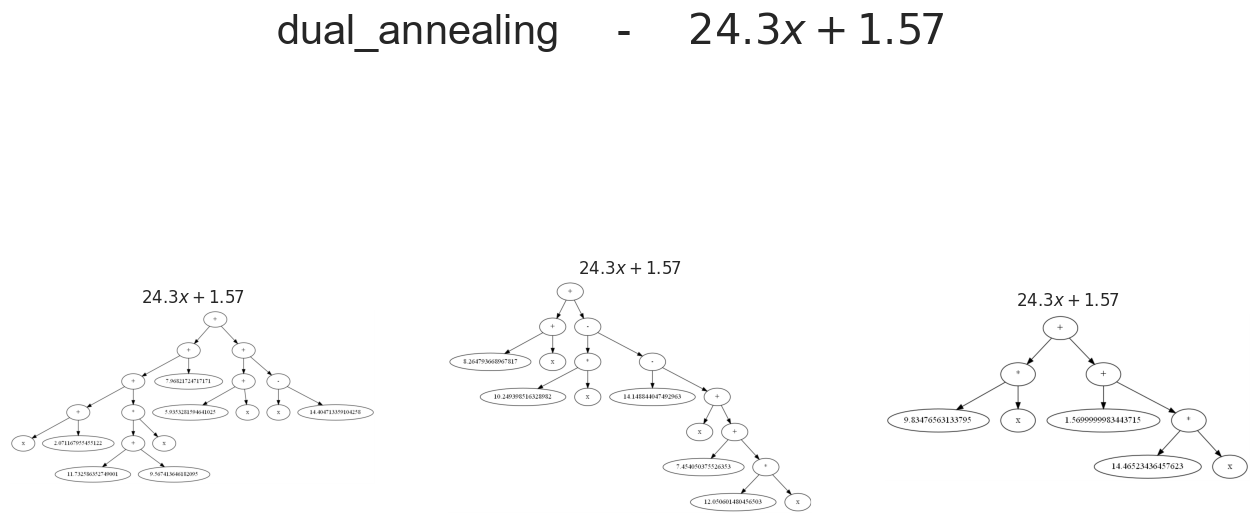

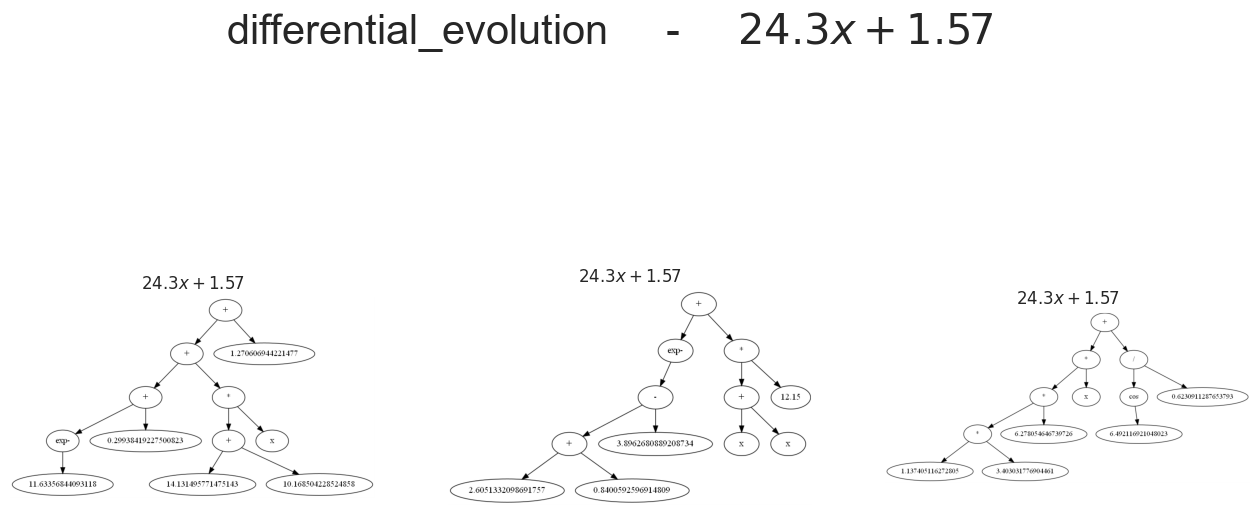

In [395]:
x = smp.symbols("x")
expr = 1.57 + 24.3*x

for c, opt in enumerate(optimization_kind):
    fig, axs = plt.subplots(1, 3, figsize=(16, 8))

    plt.suptitle(f"{opt}     -     ${smp.printing.latex(expr)}$", fontsize=30)

    for k in range(0, 3):
        ax = axs[k]
        img = plt.imread(f"Outputs/article_tests_new/F1_new/{opt}/trees/tree-2000-8-{k}_img.png")
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(f"${smp.printing.latex(exprs[c][k])}$")
    plt.show()

## F7

$$y(x) = 213.809408(1 - e^{-0.547237*x})$$

In [7]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(smp.Number)})

def generate_pdfs(path):
    paths = os.listdir(path)

    exprs = []

    for tree_path in paths:
        if "img" not in tree_path:
            with open(path+tree_path, "rb") as file:
                print(path+tree_path)
                tree = pickle.load(file)
                tree.visualize_tree().render(path+tree_path+"_img", format="png")

                exprs.append(round_expr(tree.toSmpExpr(operators, functions, custom_functions_dict).expand(), 8))
    return exprs

In [8]:
optimization_kind = ["PSO", "LS", "random_LS", "dual_annealing", "differential_evolution"]

path = "Outputs/article_tests_new/F7_new/"

exprs = []

for opt in optimization_kind:
    expr = generate_pdfs(path+opt+"/trees/")
    exprs.append(expr)

Outputs/article_tests_new/F7_new/PSO/trees/tree-2000-8-0
Outputs/article_tests_new/F7_new/PSO/trees/tree-2000-8-1
Outputs/article_tests_new/F7_new/PSO/trees/tree-2000-8-2
Outputs/article_tests_new/F7_new/LS/trees/tree-2000-8-0
Outputs/article_tests_new/F7_new/LS/trees/tree-2000-8-1
Outputs/article_tests_new/F7_new/LS/trees/tree-2000-8-2
Outputs/article_tests_new/F7_new/random_LS/trees/tree-2000-8-0
Outputs/article_tests_new/F7_new/random_LS/trees/tree-2000-8-1
Outputs/article_tests_new/F7_new/random_LS/trees/tree-2000-8-2
Outputs/article_tests_new/F7_new/dual_annealing/trees/tree-2000-8-0
Outputs/article_tests_new/F7_new/dual_annealing/trees/tree-2000-8-1
Outputs/article_tests_new/F7_new/dual_annealing/trees/tree-2000-8-2
Outputs/article_tests_new/F7_new/differential_evolution/trees/tree-2000-8-0
Outputs/article_tests_new/F7_new/differential_evolution/trees/tree-2000-8-1
Outputs/article_tests_new/F7_new/differential_evolution/trees/tree-2000-8-2


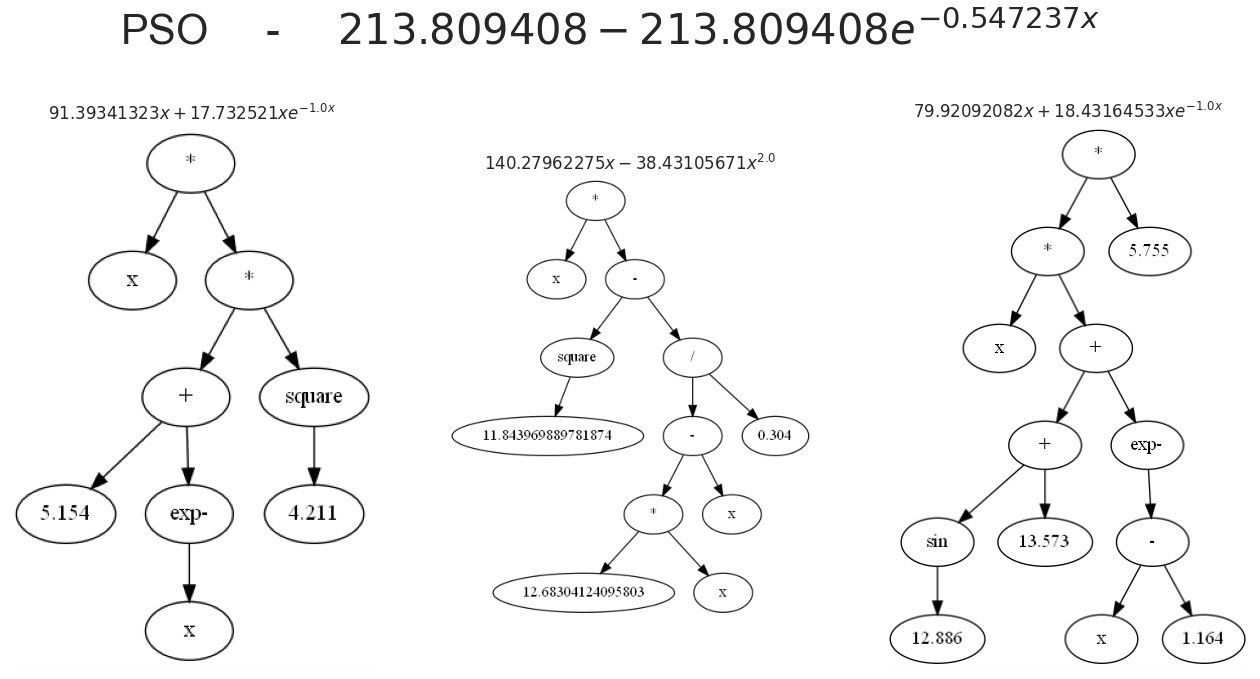

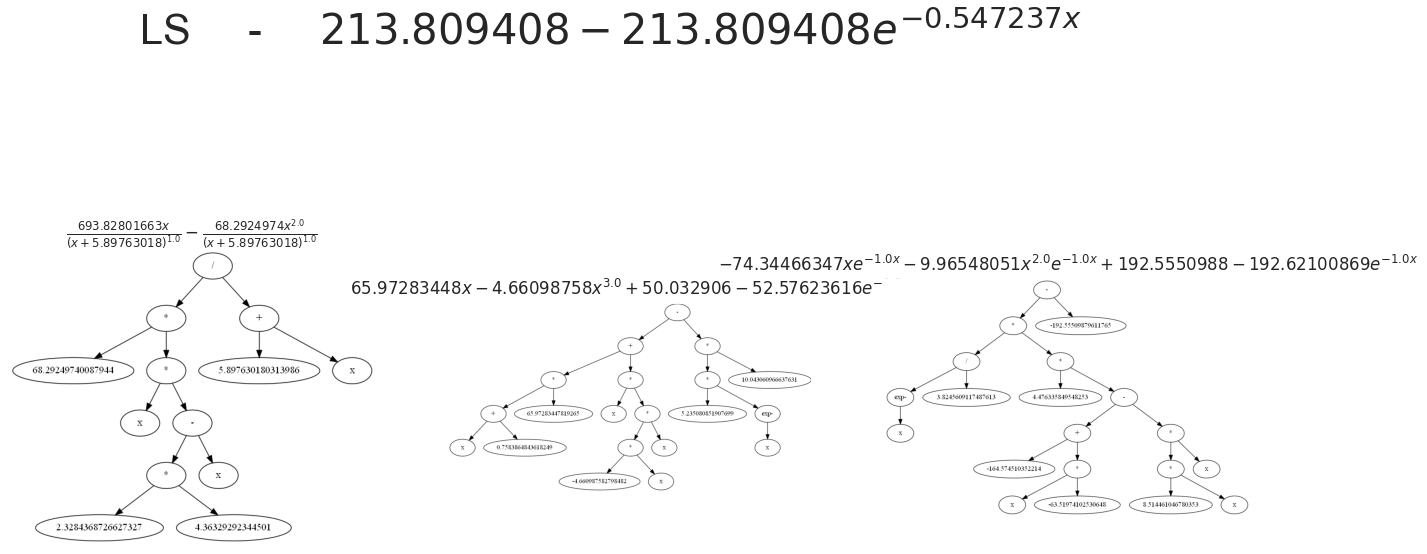

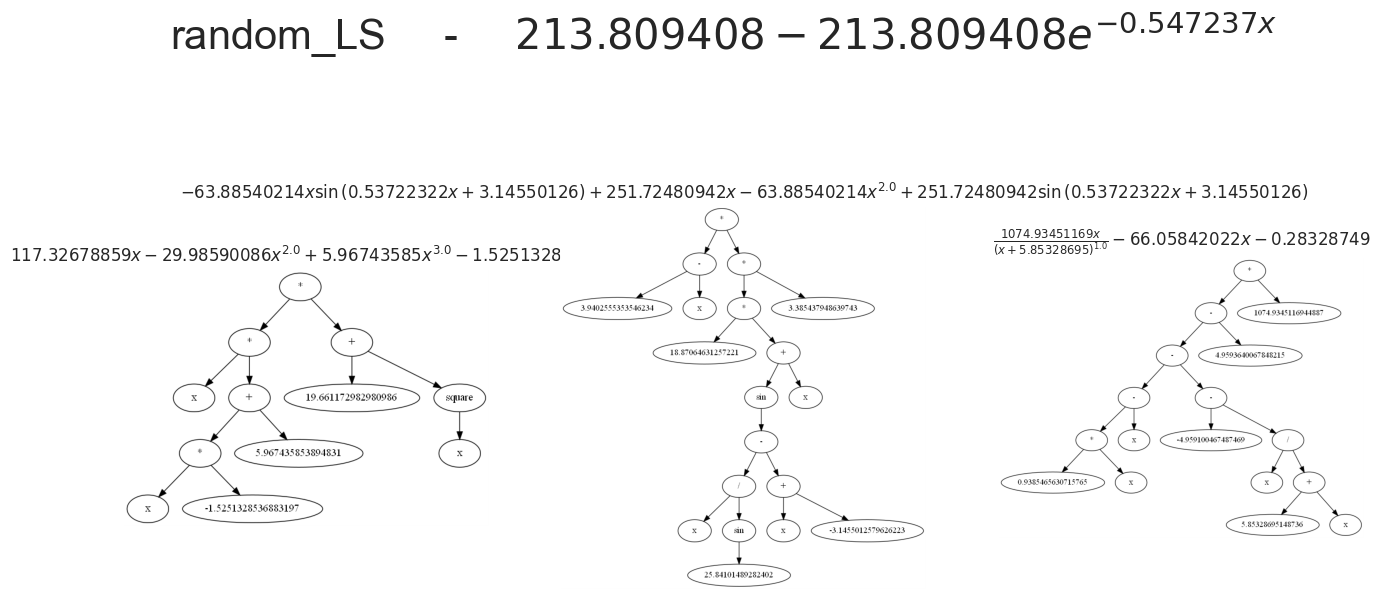

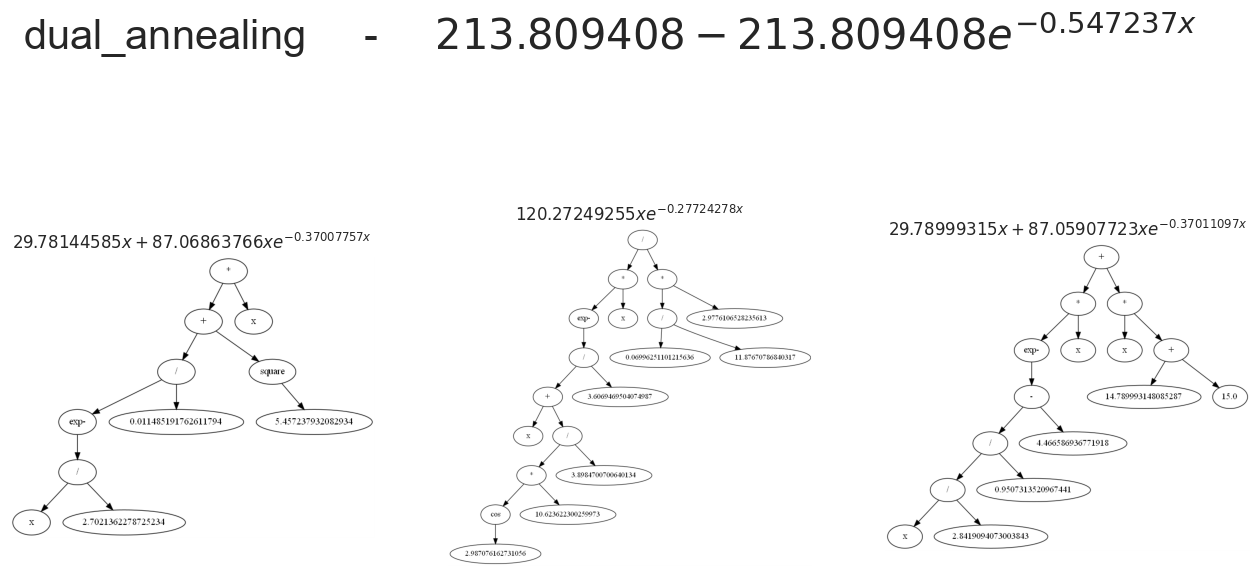

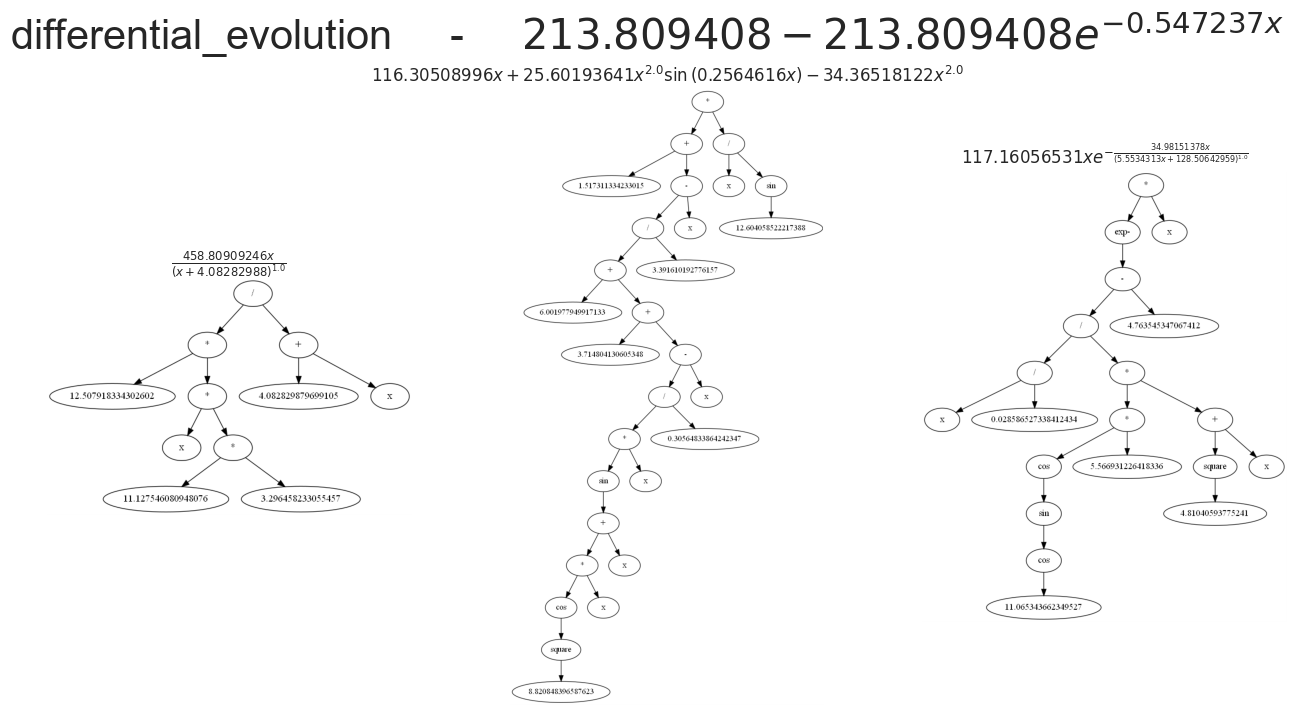

In [10]:
x = smp.symbols("x")
expr = 213.809408*(1 - smp.exp(-0.547237*x))

for c, opt in enumerate(optimization_kind):
    fig, axs = plt.subplots(1, 3, figsize=(16, 8))

    plt.suptitle(f"{opt}     -     ${smp.printing.latex(expr)}$", fontsize=30)

    for k in range(0, 3):
        ax = axs[k]
        img = plt.imread(f"Outputs/article_tests_new/F7_new/{opt}/trees/tree-2000-8-{k}_img.png")
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(f"${smp.printing.latex(exprs[c][k])}$")
    plt.show()

## F11

$$y(x) = 6.87 + 11\cos(7.23x^3)$$

In [15]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(smp.Number)})

def generate_pdfs(path):
    paths = os.listdir(path)

    exprs = []

    for tree_path in paths:
        if "img" not in tree_path:
            with open(path+tree_path, "rb") as file:
                print(path+tree_path)
                tree = pickle.load(file)
                tree.visualize_tree().render(path+tree_path+"_img", format="png")

                exprs.append(round_expr(tree.toSmpExpr(operators, functions, custom_functions_dict).expand(), 4))
    return exprs

In [16]:
optimization_kind = ["PSO", "LS", "random_LS", "dual_annealing", "differential_evolution"]

path = "Outputs/article_tests_new/F11_new/"

exprs = []

for opt in optimization_kind:
    expr = generate_pdfs(path+opt+"/trees/")
    exprs.append(expr)

Outputs/article_tests_new/F11_new/PSO/trees/tree-2000-8-0
Outputs/article_tests_new/F11_new/PSO/trees/tree-2000-8-1
Outputs/article_tests_new/F11_new/PSO/trees/tree-2000-8-2
Outputs/article_tests_new/F11_new/LS/trees/tree-2000-8-0
Outputs/article_tests_new/F11_new/LS/trees/tree-2000-8-1
Outputs/article_tests_new/F11_new/LS/trees/tree-2000-8-2
Outputs/article_tests_new/F11_new/random_LS/trees/tree-2000-8-0
Outputs/article_tests_new/F11_new/random_LS/trees/tree-2000-8-1
Outputs/article_tests_new/F11_new/random_LS/trees/tree-2000-8-2
Outputs/article_tests_new/F11_new/dual_annealing/trees/tree-2000-8-0
Outputs/article_tests_new/F11_new/dual_annealing/trees/tree-2000-8-1
Outputs/article_tests_new/F11_new/dual_annealing/trees/tree-2000-8-2
Outputs/article_tests_new/F11_new/differential_evolution/trees/tree-2000-8-0
Outputs/article_tests_new/F11_new/differential_evolution/trees/tree-2000-8-1
Outputs/article_tests_new/F11_new/differential_evolution/trees/tree-2000-8-2


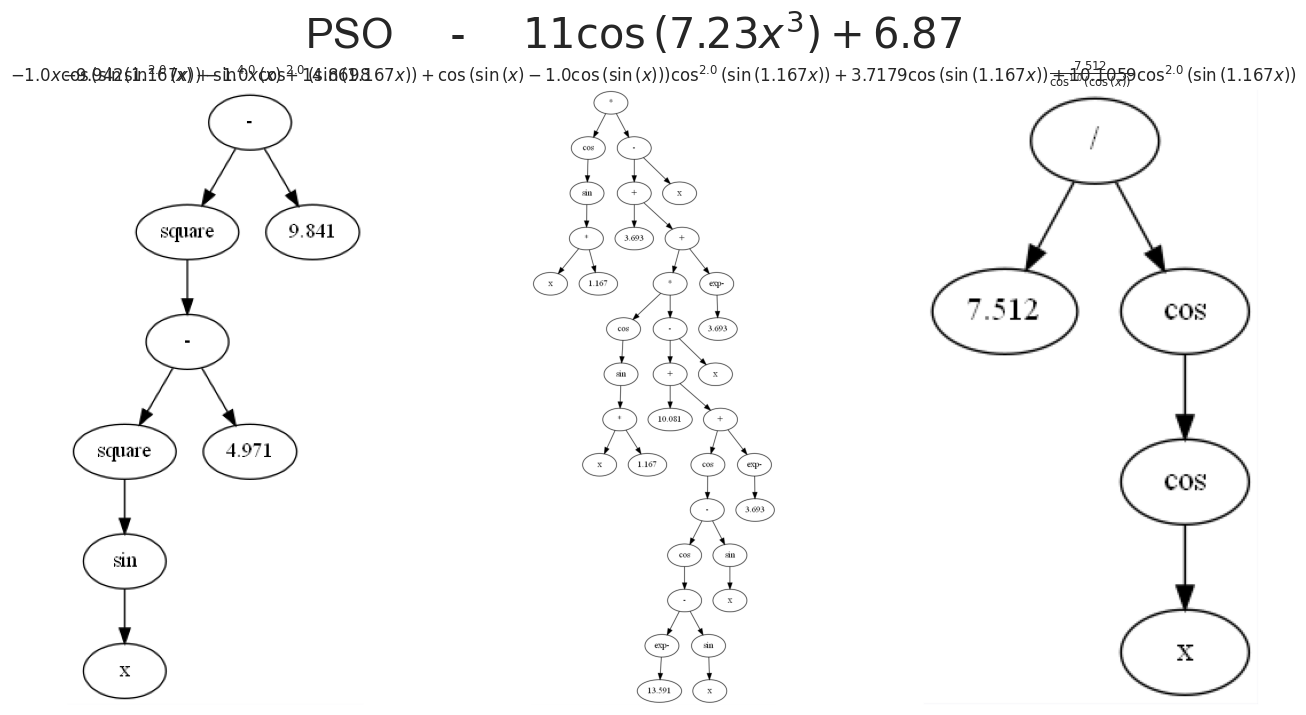

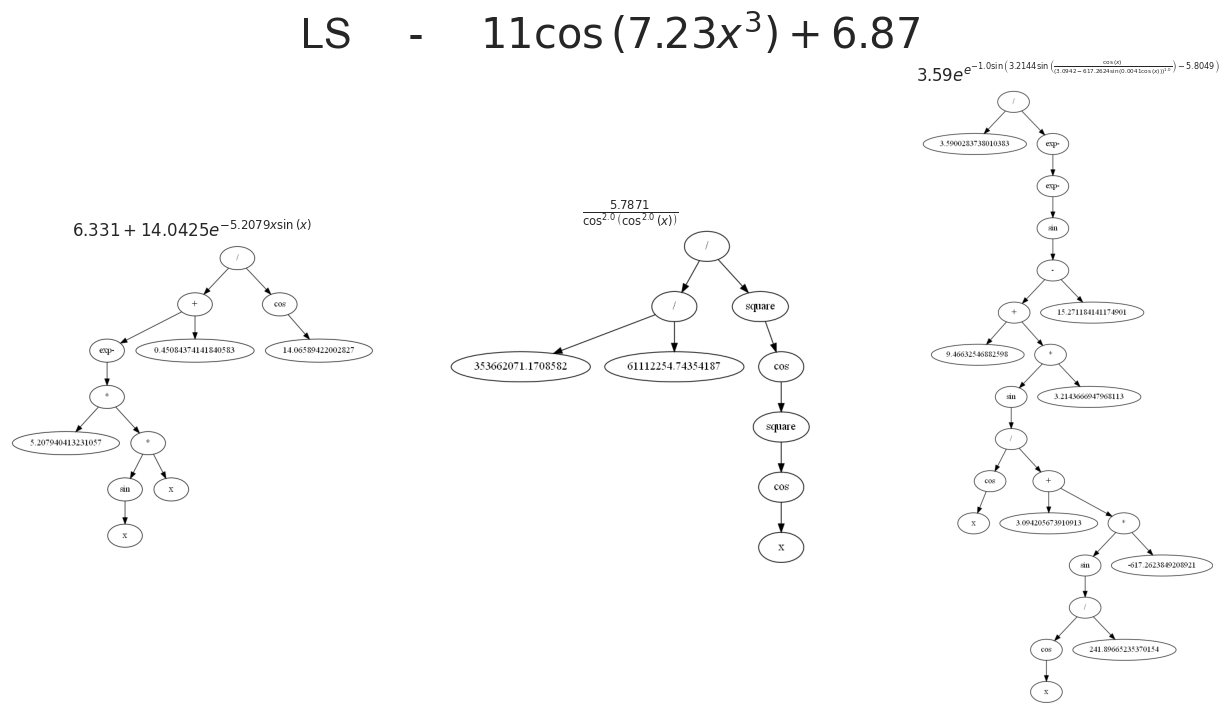

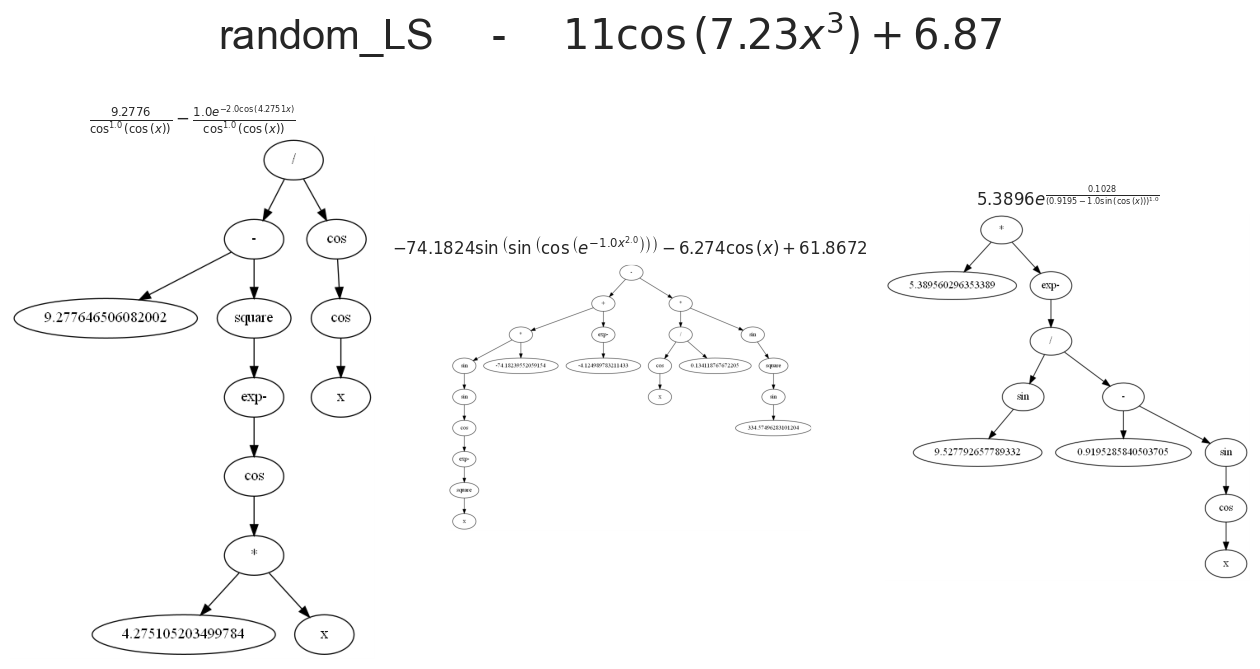

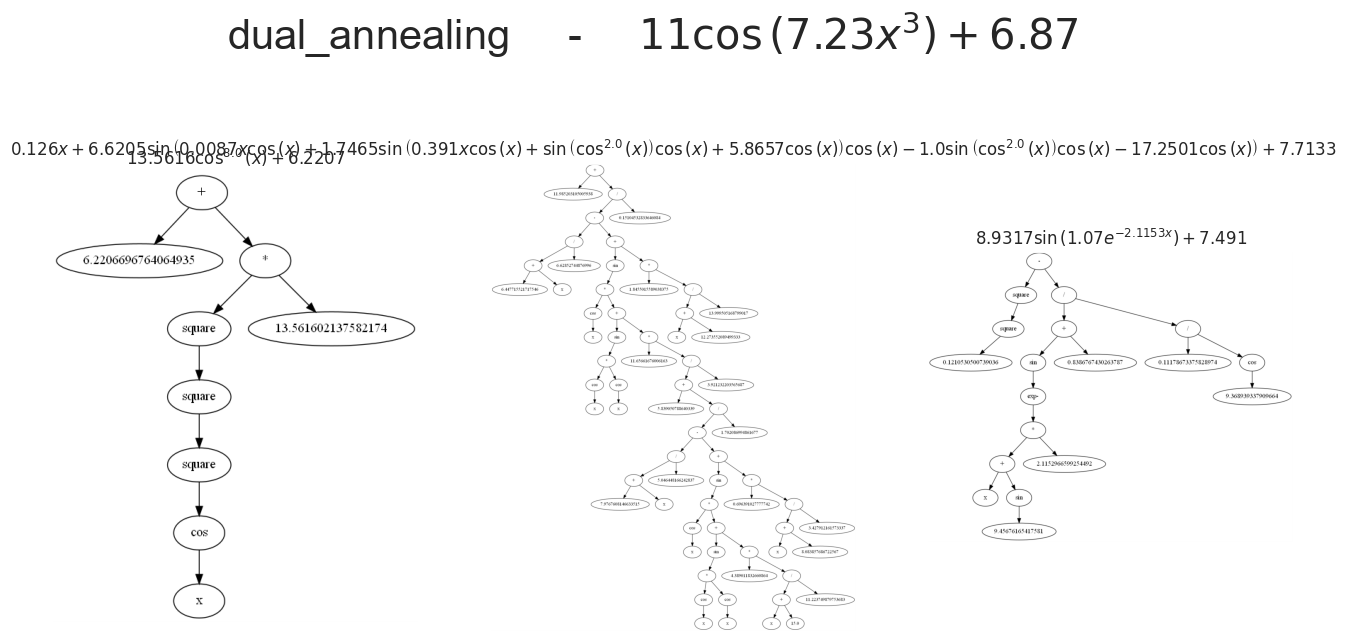

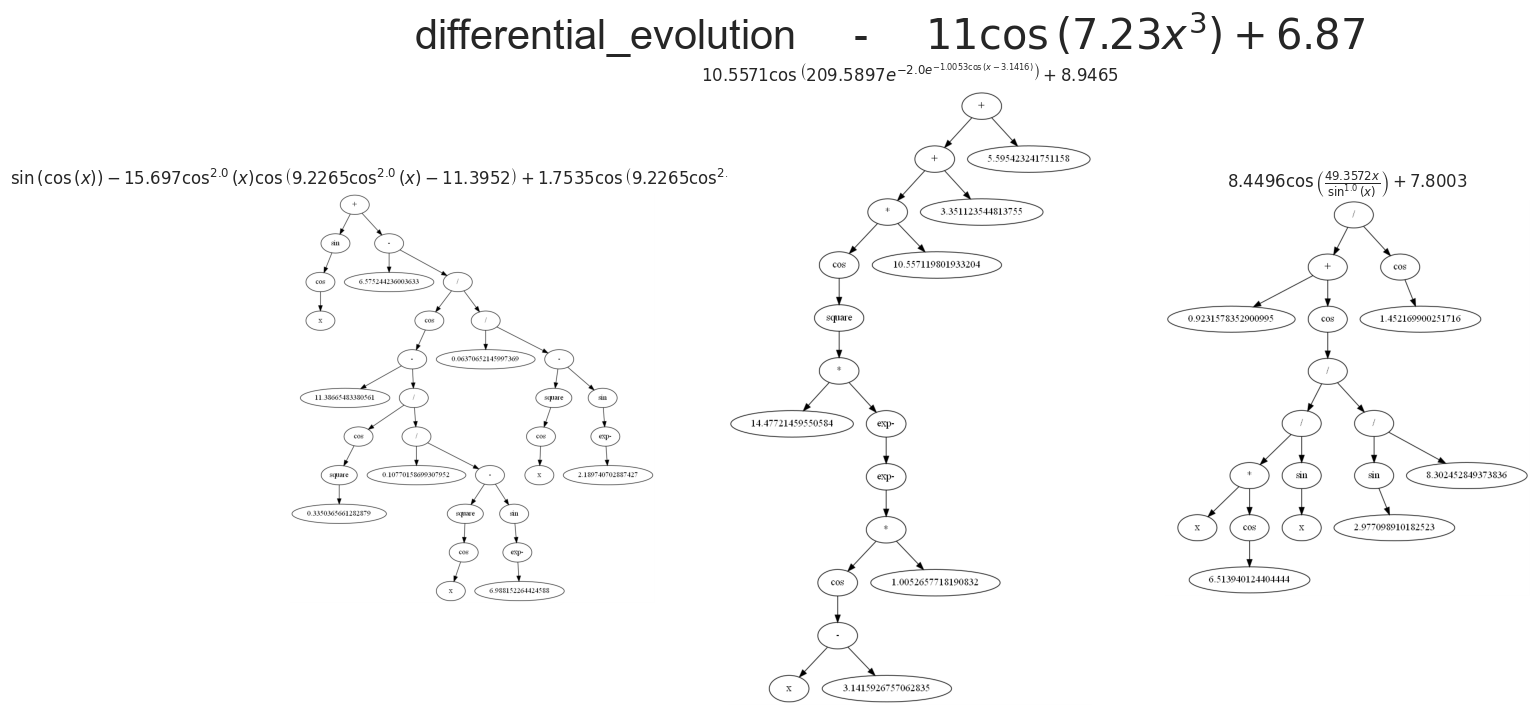

In [17]:
x = smp.symbols("x")
expr = 6.87 + 11*smp.cos(7.23*x**3)

for c, opt in enumerate(optimization_kind):
    fig, axs = plt.subplots(1, 3, figsize=(16, 8))

    plt.suptitle(f"{opt}     -     ${smp.printing.latex(expr)}$", fontsize=30)

    for k in range(0, 3):
        ax = axs[k]
        img = plt.imread(f"Outputs/article_tests_new/F11_new/{opt}/trees/tree-2000-8-{k}_img.png")
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(f"${smp.printing.latex(exprs[c][k])}$")
    plt.show()

# Saving

-x**2 + 2.551750006392348*x + 0.2546531201853706

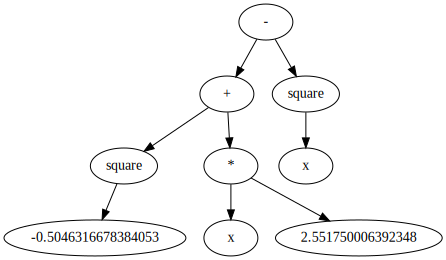

In [279]:
with open("Outputs/oblique_projectile_real/differential_evolution/trees/tree-100-5-2", "rb") as file:
    tree = pickle.load(file)
    smp_expr = tree.toSmpExpr(operators, functions, {"square": ["(", ")**2"]})
    display(smp_expr.expand())
tree.visualize_tree()

In [281]:
tree.visualize_tree().render()

'Digraph.gv.pdf'

In [50]:
# functions_op = {"exp": lambda a: np.exp(a), "exp-": lambda a: np.exp(-a)}
# custom_functions_dict = {"exp": ["np.exp(", ")"], "exp-": ["np.exp(-", ")"]}

functions_op=None
custom_functions_dict=None
SR = SymbolicRegression(3, functions=functions_op, custom_functions_dict=custom_functions_dict)


tanh(2*x**(9/2) + 2*x**(7/2) + x**5 + x**4 + 2*x**3 + x**2)

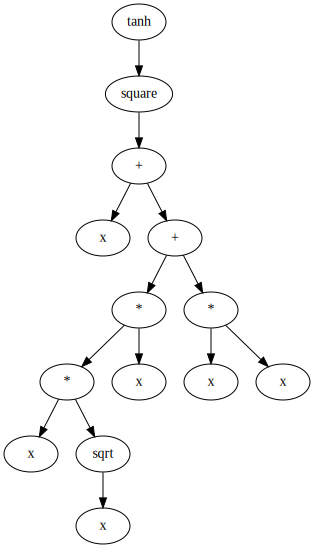

In [62]:
with open("Outputs/fundamental/base_generations/trees/tree-2000-10-0", "rb") as file:
    tree = pickle.load(file)
    smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    display(smp_expr.expand())
tree.visualize_tree()